In [2]:
import networkx as nx
%matplotlib inline
import numpy.random as rnd

In [3]:
class HCgraph(nx.Graph):
    def __init__(self, household_size, community_size, number_of_communities):
        G = self.create_community(household_size, community_size)
        for i in range(1, number_of_communities):
            C = self.create_community(household_size, community_size-1)
            G = self.add_community(household_size, G, C)
        last_community = len(G.nodes())/household_size-1
        for i in range(0, household_size*(community_size-1)/household_size):
            G.add_edge(self.get_random_node(household_size, last_community), self.get_random_node(household_size, i))
        nx.Graph.__init__(self,G)

    def create_household(self, household_size):
        G=nx.complete_graph(household_size)
        return G

    def create_community(self, household_size, community_size):
        households = []
        for i in range(community_size):
            H =self.create_household(household_size)
            households.insert(0, H)
        G = households[0]
        for i in range(1, len(households)):
            G = nx.disjoint_union(G, households[i])
        for i in range(len(households)-1):
            for j in range(i+1, len(households)):
                G.add_edge(self.get_random_node(household_size, i), self.get_random_node(household_size, j))
        print G.nodes()
        return G

    def add_community(self, household_size, G, community):
        last_community = len(G.nodes())/household_size-1
        G=nx.disjoint_union(G, community)
        for i in range(last_community+1, last_community+len(community.nodes())/household_size+1):
            G.add_edge(self.get_random_node(household_size, last_community), self.get_random_node(household_size, i))
        return G

    def get_random_node(self, household_size, household_number):
        low = household_size*household_number
        return rnd.randint(low, low+household_size-1)
    

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
7
6
6
3
18 26
neighbors 3
neighbors 4
neighbors 2
neighbors 5
neighbors 2
neighbors 2
neighbors 4
neighbors 4
neighbors 2
neighbors 4
neighbors 2
neighbors 2
neighbors 3
neighbors 5
neighbors 2
neighbors 3
neighbors 3
neighbors 2
neighbors 4
neighbors 4
neighbors 2


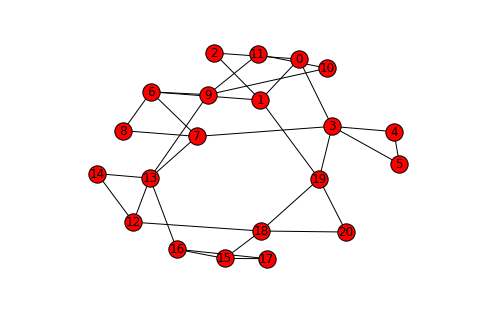

In [21]:
household_size = 3
community_size = 3
number_of_communities = 3
G = HCgraph(household_size, community_size, number_of_communities)
nx.draw(G, with_labels = True)
print G.nodes()
#number of households
print len(G.nodes())/household_size
s_node = 19
# get the household number in which the node resides
household_number = s_node/household_size
# household number mod community_size-1 - household number that reside in several communities
#if household in one community it is in node/((community_size-1)*household_size)

#community 0 - 0-8, 1 - 6-14, 2 - 12-20, 3 - 18-5
print household_number
print (community_size-1)*household_size
s_comm = s_node/((community_size-1)*household_size)
print s_comm
s_from = s_comm*((community_size-1)*household_size)
s_to = s_from+household_size*community_size-1
#deal with overflow
print s_from, s_to
for n in G.nodes():
    print "neighbors",len(G.neighbors(n))